## Calculate influence

In [38]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential
from tracin import influence

# Get train and test data
(train_X,train_Y),(test_X,test_Y) = datasets.mnist.load_data()
train_X = train_X.reshape(-1, 28 * 28) / 255.0
test_X  = test_X.reshape(-1, 28 * 28) / 255.0

eta = 0.001

# Form model
model = models.Sequential([
  layers.Dense(128,input_shape=(784,),activation='relu'),
  layers.Dense(10)
])

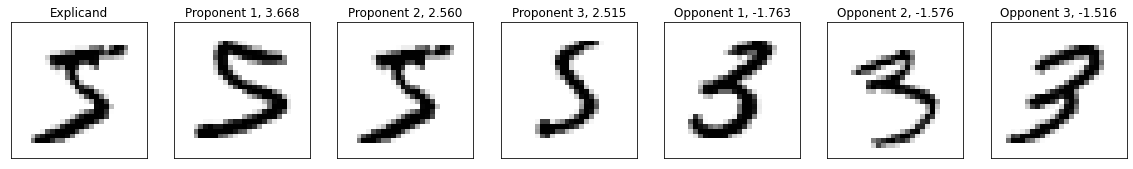

In [43]:
from sklearn import datasets
import matplotlib.pyplot as plt

# Calculate influences
influences = influence(train_X[0:1], train_Y[0:1], 
                       train_X[0:1000], train_Y[0:1000], 
                       "model/mnist/model{}.hdf5",
                       model, eta, 20)

# Number of proponents and opponents to plot
plt.rcParams["figure.figsize"] = (20,3)

k = 3
num_images = 1+k*2
img_index = 1

#Load the digits dataset
digits = datasets.load_digits()

# Display the first digit
plt.subplot(1,num_images,img_index)
plt.imshow(train_X[0].reshape(28,28), cmap=plt.cm.gray_r)
plt.xticks([]); plt.yticks([])
plt.title("Explicand")
img_index += 1

top_k = influences.argsort()[0][-k:]
for i in range(k):
    plt.subplot(1,num_images,img_index)
    plt.imshow(train_X[top_k[k-(i+1)]].reshape(28,28), cmap=plt.cm.gray_r)
    plt.xticks([]); plt.yticks([])
    plt.title("Proponent {}, {:.3f}".format(i+1, influences[0,top_k[k-(i+1)]]))
    img_index += 1

bot_k = influences.argsort()[0][:k]
for i in range(k):
    plt.subplot(1,num_images,img_index)
    plt.imshow(train_X[bot_k[i]].reshape(28,28), cmap=plt.cm.gray_r)
    plt.xticks([]); plt.yticks([])
    plt.title("Opponent {}, {:.3f}".format(i+1, influences[0,bot_k[i]]))
    img_index += 1

plt.show()